# Google Play Store Apps and Reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook,we will assume the role of a company looking to invest money into Android app market by comparing over ten thousand apps in Google Play across different categories.

Let's take a look at the data, which consists of two files:

- apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
- user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

The most important features that we will be working our 'Installs','Price','Rating' and 'Reviews'.All of these features need to
either be cleaned or converted into the corect data format before we can move onto analysis. There are certain Apps which are 
duplicated thus need to be removed.

In [24]:
chars=['+',',']
for x in chars:
    df['Installs']=df['Installs'].str.replace(x,'')
df['Installs']    

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [25]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [26]:
df.drop((df[df['Installs']=='Free']).index.item(),axis='index',inplace=True)

In [27]:
df['Price']=df['Price'].str.replace('$','')

In [28]:
df['Installs']=df.Installs.astype('int')
df['Price']=df.Price.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [29]:
df.drop_duplicates(subset=['App','Category','Content Rating','Genres'],inplace=True)

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Type of App more feasible for investment

Two types of apps:
 - Free
 - Paid

Hypothesis:Free apps would be more downloaded(Installed) thus more popular and a better choice for future investments 

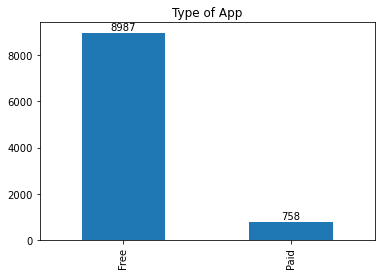

In [57]:
fig=df.Type.value_counts().plot(kind='bar')
plt.title('Type of App')
fig.bar_label(fig.containers[0],label_type='edge',padding=1)
plt.show()

In [32]:
df.groupby('Type').agg({'Installs':'median'})

,Installs
Type,
Free,100000.0
Paid,1000.0


As 'Installs' is our KPI,it can be measured and gives a good indication of popularity,my hypothesis was true that we should invest our money into 'free' Apps as the median number of downloads tell us.The median number of downloads for the Free Type is 100 times more than the paid one

# Exploring different App Categories for investment

Some of the questions that could be looked upon are:
- Number of apps of each category
- Most Popular Category
- Least Popular Category
- Average Number of Installs for each App Category
- Average Rating for each Category 
- who is the target audience for the popular Apps
- Which Genres do popular Categories belong to 

Hypothesis:Most popular Category would be Games

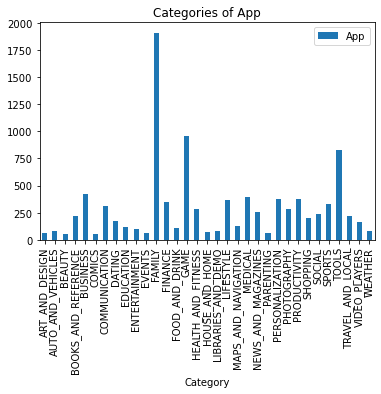

In [67]:
df.groupby('Category').agg({'App':'count'}).plot(kind='bar')
plt.title('Categories of App')
plt.show()

In [34]:
df2=df.groupby('Category').agg({'App':'count'}).reset_index()
most_popular_app=df2[df2['App']==df2['App'].max()]
most_popular_app

,Category,App
11,FAMILY,1909


In [35]:
least_popular_app=df2[df2['App']==df2['App'].min()]
least_popular_app

,Category,App
2,BEAUTY,53


In [63]:
df_=df.groupby('Category').agg({'App':'count'}).reset_index().sort_values(by='App',ascending=False).reset_index(drop=True)
Popular_Categories=df_.iloc[0:5]
Popular_Categories

,Category,App
0,FAMILY,1909
1,GAME,961
2,TOOLS,829
3,BUSINESS,420
4,MEDICAL,396


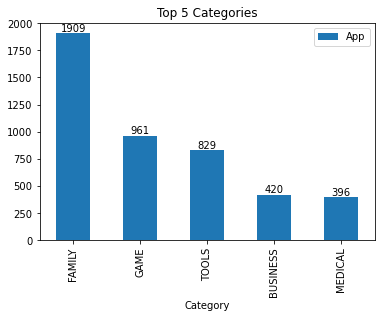

In [68]:
ax=Popular_Categories.set_index('Category').plot(kind='bar')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Top 5 Categories')
plt.show()

In [37]:
df1=df[df['Category'].isin(Popular_Categories['Category'])]
df1.groupby('Category').agg({'Installs':'median'}).reset_index().sort_values(by='Installs',ascending=False)

,Category,Installs
2,GAME,1000000.0
1,FAMILY,100000.0
4,TOOLS,50000.0
0,BUSINESS,1000.0
3,MEDICAL,1000.0


Though the number of Apps are greater of 'FAMILY' but 'GAME' Category on average has 10 times more Installs than FAMILY Category. Let's try to figure out the reason for the difference.
We wil try to explore three different avenues:
- whether GAME category has more free apps than FAMILY
- Could the Content Rating be affecting this difference
- Lastly,how are the Genres affecting the Categories

In [38]:
df1_1=df1[(df1['Category']=='GAME')|(df1['Category']=='FAMILY')]
df1_1.groupby(['Category','Type']).agg({'App':'count'})

App
Category Type      
FAMILY   Free  1723
         Paid   185
GAME     Free   879
         Paid    82

Both Categories have similiar proportion of free apps
but lets dig a bit deeper

In [39]:
df1_1.groupby(['Category','Type']).agg({'Installs':'median'})

Installs
Category Type           
FAMILY   Free   100000.0
         Paid     5000.0
GAME     Free  1000000.0
         Paid    10000.0

It seems we might be onto something.The GAME Paid Apps are double on average downloaded than Family Paid apps.
let's see whether price plays any part in this difference.

In [40]:
import seaborn as sns
df1_0=df1_1[df1_1['Type']=='Paid']


In [41]:
age_drop=df1_0[df1_0['Price']>200].index
df1_0.drop(age_drop,inplace=True)

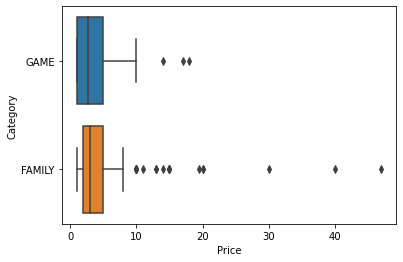

In [42]:
sns.boxplot(data=df1_0,x='Price',y='Category')
plt.show()

Plenty of outliers in the FAMILY category in comparsion to GAME which does tell us that the reason for the difference in Paid App downloads.
Let's now look at the Free type difference between FAMILY and GAME
First let's look at which genres are most popular and see if those are affecting are FAMILY and GAME Category

In [43]:
x=df.groupby('Genres').agg({'App':'count'}).reset_index().sort_values(by='App',ascending=False).reset_index(drop=True)
popular_genres=x.iloc[0:5]
popular_genres

,Genres,App
0,Tools,828
1,Entertainment,579
2,Education,519
3,Business,420
4,Medical,396


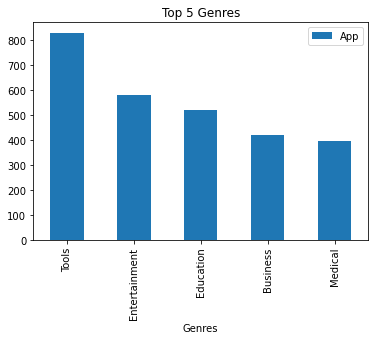

In [69]:
popular_genres.set_index('Genres').plot(kind='bar')
plt.title('Top 5 Genres')
plt.show()

In [44]:
df1_free=df1_1[df1_1['Type']=='Free']
df1_free=df1_free[df1_free['Genres'].isin(popular_genres['Genres'])]
df1_free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3873,A Call From Santa Claus!,FAMILY,3.9,3720,11M,1000000,Free,0.0,Everyone,Entertainment,"December 4, 2016",4.2.3,4.0.3 and up
3875,A Word A Day,FAMILY,3.7,2398,2.9M,500000,Free,0.0,Everyone,Education,"January 5, 2017",5.8,4.0 and up
3877,Akinator,FAMILY,4.3,1805398,55M,50000000,Free,0.0,Teen,Entertainment,"June 11, 2018",6.5.2,4.4 and up
3881,Color by Number - Draw Sandbox Pixel Art,FAMILY,4.6,10247,15M,1000000,Free,0.0,Everyone,Entertainment,"July 27, 2018",1.3.13,4.1 and up
3887,CompTIA A+ Pocket Prep,FAMILY,4.3,1311,14M,10000,Free,0.0,Everyone,Education,"July 11, 2018",4.5.2,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50,Free,0.0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [45]:
df1_free.groupby(['Category','Genres']).agg({'Installs':'median'})

Installs
Category Genres                 
FAMILY   Education        5000.0
         Entertainment   10000.0

It seems like FAMILY category contains the more popular Genres that are Education and Entertainment 

In [46]:
df1_1[df1_1['Category']=='GAME']['Genres'].value_counts().head(5)

Action       299
Arcade       185
Racing        91
Adventure     73
Card          47
Name: Genres, dtype: int64

Well it seems like if thinking of investing in games Action and Arcade are the more popular Genres for a game to be designed in. 

Which segment of target audience should we keep in mind while investing in GAME or FAMILY category.
Hypothesis:I beleieve both the categories are suited for everyone, I mean not targeting a niche market or so

In [47]:
df1_1.pivot_table(index='Category',columns='Content Rating',values='App',aggfunc='count')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,
FAMILY,1473.0,124.0,50.0,261.0,1.0
GAME,495.0,106.0,65.0,295.0,NaN


In [48]:
df1_1.pivot_table(index='Category',columns='Content Rating',values='Installs',aggfunc='median')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,
FAMILY,50000.0,1000000.0,100000.0,100000.0,500.0
GAME,1000000.0,1000000.0,1000000.0,1000000.0,NaN


GAME Category is popular across the board but FAMILY is more downloaded with the audience of  'Everyone 10+' and 'Mature 17+'

# App category and Rating

App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.
- look at the distribution of app ratings
- what is the average app ratings

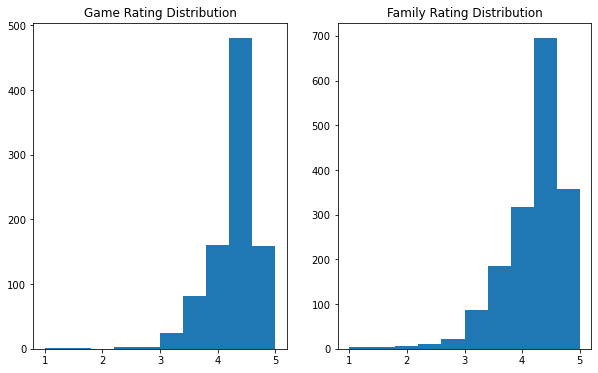

In [49]:
df1_Family=df1_1[df1_1['Category']=='FAMILY']
df1_Game=df1_1[df1_1['Category']=='GAME']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(x='Rating',data=df1_Game)
plt.title('Game Rating Distribution')
plt.subplot(1,2,2)
plt.hist(x='Rating',data=df1_Family)
plt.title('Family Rating Distribution')
plt.show()

In [50]:
df1_1.groupby('Category')['Rating'].mean()

Category
FAMILY    4.187173
GAME      4.247921
Name: Rating, dtype: float64

GAME Category has a higher average rating than FAMILY category

## Objective:Investment in the Android App Market 

Our KPI was Number of Installs as it could be measured, was simple to track and relevant to our Goal
- The Finance company could invest in Free type of App's rather than paid one's.
- Invest in GAME and FAMILY category as they have the highest number of installs on average
- In GAME Category the Genres to focus on are Action and Arcade
- In FAMILY Category the Genres to focus on are Education and Entertainment
- In GAME Category the Content could  be for anyone 
- In FAMILY category should focus more on 'Everyone 10+' or 'Mature 17+'
